# Code to be added to utils

## general utils

In [1]:
def remove_cats(adata):

    cat_columns = adata.obs.select_dtypes(['category']).columns
    adata.obs[cat_columns] = adata.obs[cat_columns].astype(str)
    
    return adata

## plotting utils

In [11]:
def tiss_cell_fractions(adata,
                        technology_col='method',
                        groupby='tissue',
                        category='cell_ontology_class',
                        dataset="Pilot2"):
    
    for m in set(adata.obs[technology_col]):
        adata_subset = adata[adata.obs[technology_col] == m].copy()
        for t in set(adata_subset.obs[groupby]):
            print(t)
            tiss = adata_subset[adata_subset.obs[groupby] == t].copy()

            aux = tiss.obs.groupby([category]).count()
            aux = pd.DataFrame(aux).reset_index()
            aux['fraction'] = aux[aux.columns[1]]/aux[aux.columns[1]].sum()
            aux['cell_number'] = aux[aux.columns[1]]

            aux[[category,'fraction','cell_number']].to_csv("./cell_fractions/"+dataset+"_"+m+"_"+t+'.csv')

            f, ax = plt.subplots(figsize=(15,10)) 
            g = sns.barplot(data = aux, y = 'fraction',x = category, ax = ax)
            ax.set_xticklabels(ax.get_xticklabels(),rotation=90);
            ax.set(xlabel= dataset +" "+ t +' cell types', ylabel='Relative abundance in'+ m +' data');
            plt.tight_layout()
            plt.savefig("./cell_fractions/"+dataset+"_"+m+"_"+t+'.pdf')

# Setup

In [ ]:
%load_ext autoreload
%autoreload 2

In [3]:
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
import sys
sys.path.append('/home/angela/src/scVI_TSP/')
sys.path.append('/home/angela/sapiens/tabula-sapiens/')
from utils.annotations_utils import *
from utils.colorDict import *
from utils.general_utils import *
# from utils.plotting_utils import *

# Read data

In [4]:
data_path = "/mnt/ibm_lg/angela/sapiens/data/sapiens_paper1/"

In [5]:
adata = sc.read_h5ad(data_path + "Pilot1_Pilot2.Final.h5ad")
adata = remove_cats(adata)
adata

AnnData object with n_obs × n_vars = 203513 × 58870
    obs: '10X_run', 'smartseq2_barcode', 'smartseq2_library_plate', 'smartseq2_sorting_direction', 'smartseq2_sort_order', 'smartseq2_cDNA_Plate', 'cell_id', 'method', 'notes', 'donor', 'smartseq2_sorted_population', '10X_replicate', '10X_sample', 'sequencer', 'sex', 'anatomical_position', 'tissue', 'smartseq2_well_seq', '10X_barcode', 'n_counts', 'n_genes', 'batch', 'donor_tech_tissue', 'donor_tech', 'compartment', 'compartment_pred', 'propagated_cell_ontology_class', 'manual_cell_ontology_class'
    var: 'feature_types-0-0', 'n_cells-0-0', 'gene_symbol-0-0', 'n_cells-1-0', 'n_cells-0', 'feature_types-0-0-1', 'gene_symbol-0-0-1', 'n_cells-1-0-1', 'n_cells-1-1', 'n_cells', 'ensemble_id'
    uns: 'compartment_colors', 'compartment_pred_colors', 'donor_colors', 'donor_tech_colors', 'method_colors', 'neighbors', 'tissue_colors', 'umap'
    obsm: 'UMAP_donor_tech.100', 'UMAP_donor_tech.200', 'UMAP_donor_tech.50', 'X_scvi', 'X_scvi_donor_t

# Generate figures -- to be replaced by function

In [ ]:
for p in [tsp1,tsp2]:
    
    p = p[p.obs['method']=='10X'].copy()
    
    for t in list(set(p.obs['tissue'])):
        print(t)
        tiss = p[p.obs['tissue'] == t].copy()
        
        try:
            
            aux = tiss.obs.groupby(['scANVI Prediction By Organ'])['sample'].count()
            aux = pd.DataFrame(aux).reset_index()
            aux['sample'] = aux['sample']/aux['sample'].sum()
            
            f, ax = plt.subplots(figsize=(15,10)) 
            g = sns.barplot(data = aux, y = 'sample',x = 'scANVI Prediction By Organ', ax = ax)
            ax.set_xticklabels(ax.get_xticklabels(),rotation=90);
            ax.set(xlabel="Pilot1 "+t+' cell types', ylabel='Relative abundance in 10X data');
            plt.tight_layout()
            plt.savefig("./cell_fractions/Pilot1_"+t+'.pdf')
            

        except:
            aux = tiss.obs.groupby(['cell_ontology_class'])['sample'].count()
            aux = pd.DataFrame(aux).reset_index()
            aux['sample'] = aux['sample']/aux['sample'].sum()
            
            f, ax = plt.subplots(figsize=(15,10)) 
            g = sns.barplot(data = aux, y = 'sample',x = 'cell_ontology_class', ax = ax)
            ax.set_xticklabels(ax.get_xticklabels(),rotation=90);
            ax.set(xlabel="Pilot2 "+t+' cell types', ylabel='Relative abundance in 10X data');
            plt.tight_layout()
            plt.savefig("./cell_fractions/Pilot2_"+t+'.pdf')

        
    

# Updating 

Bone_Marrow
Large_Intestine
Muscle
Thymus
Kidney
Skin
Lung
Blood
Vasculature
Trachea
Small_Intestine
Lymph_Node
Bladder
Spleen
Spleen
Bone_Marrow
Large_Intestine
Muscle
Thymus
Kidney
Skin
Lung


/home/angela/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/home/angela/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Vasculature


/home/angela/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Trachea


/home/angela/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Small_Intestine


/home/angela/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Lymph_Node


/home/angela/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Bladder


/home/angela/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Blood


/home/angela/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


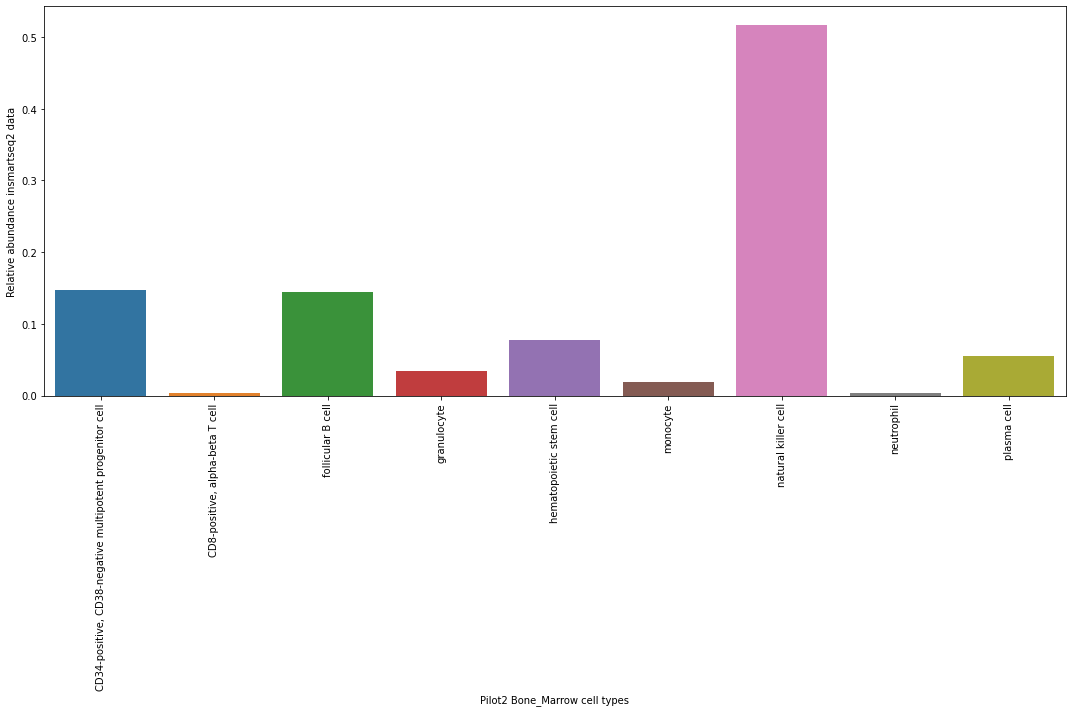

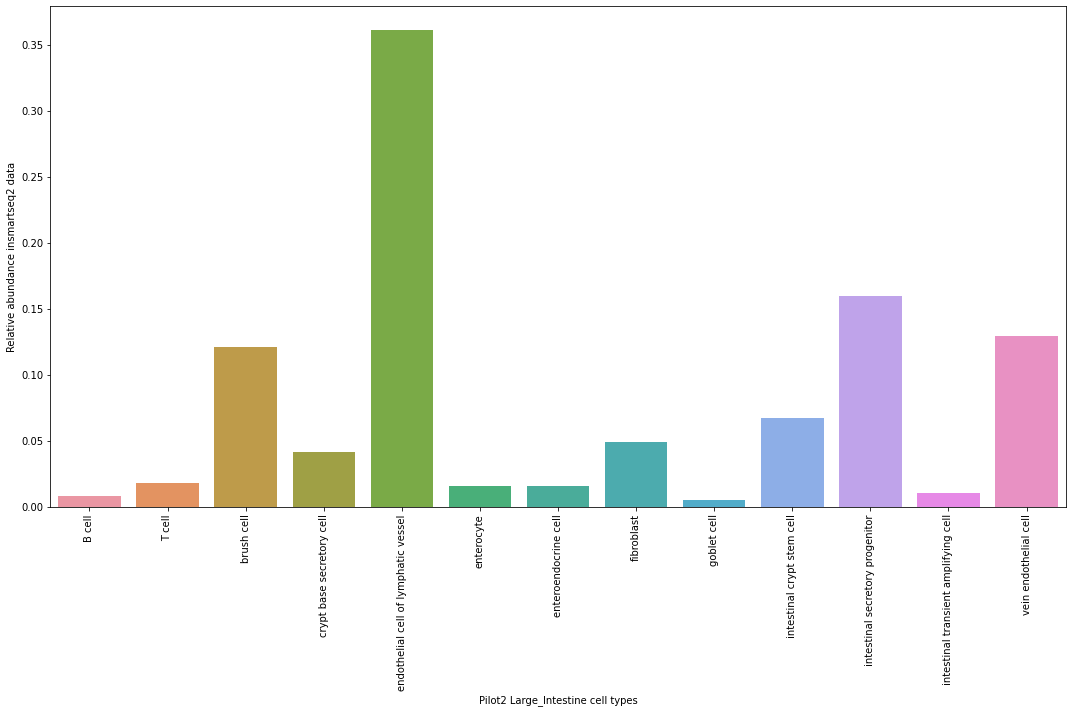

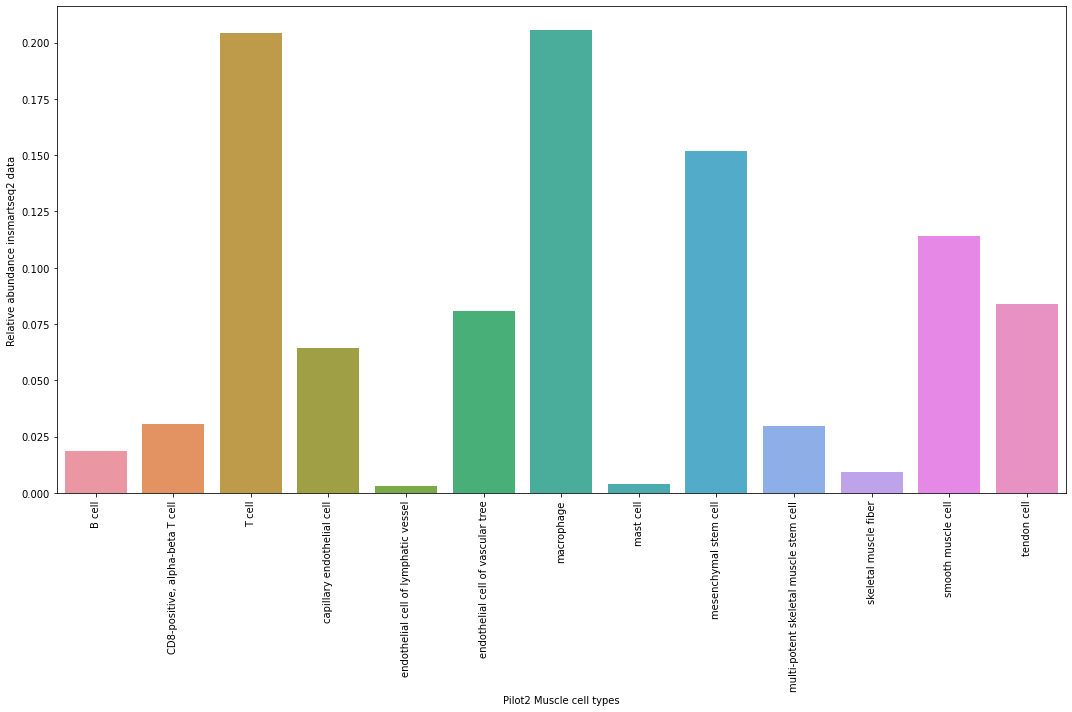

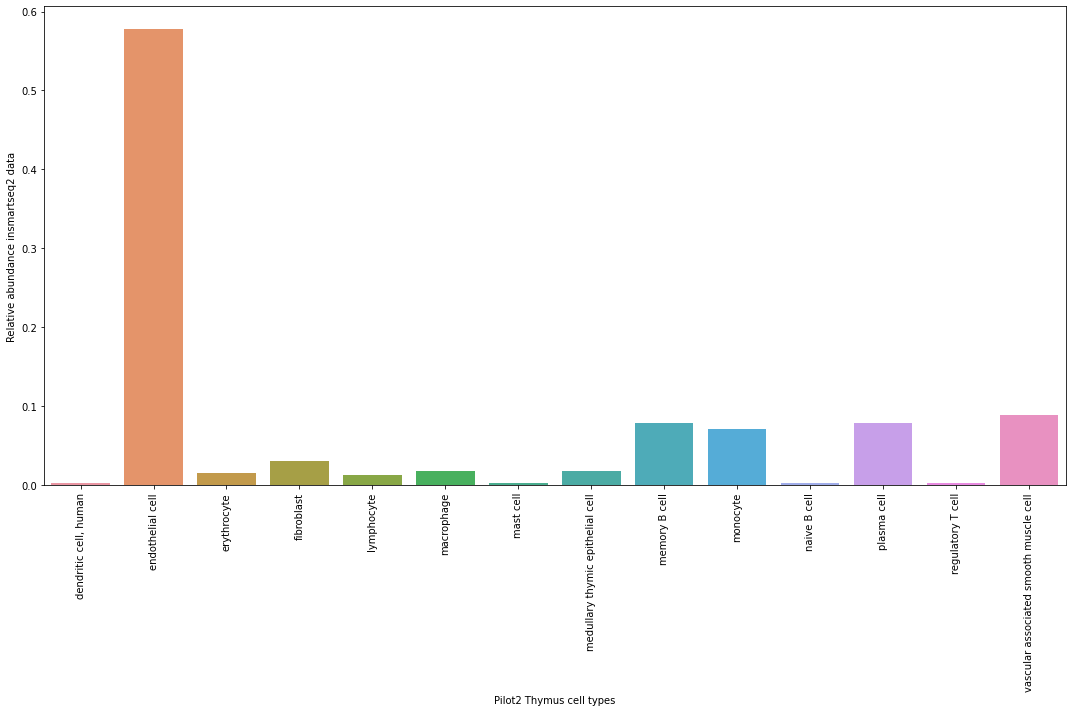

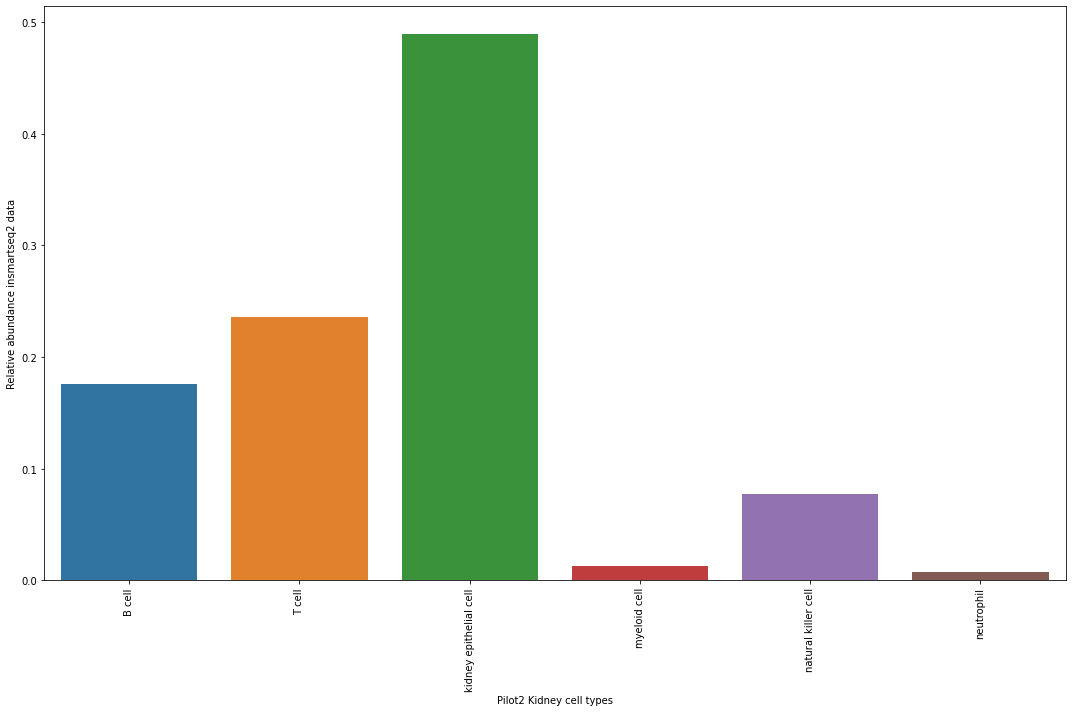

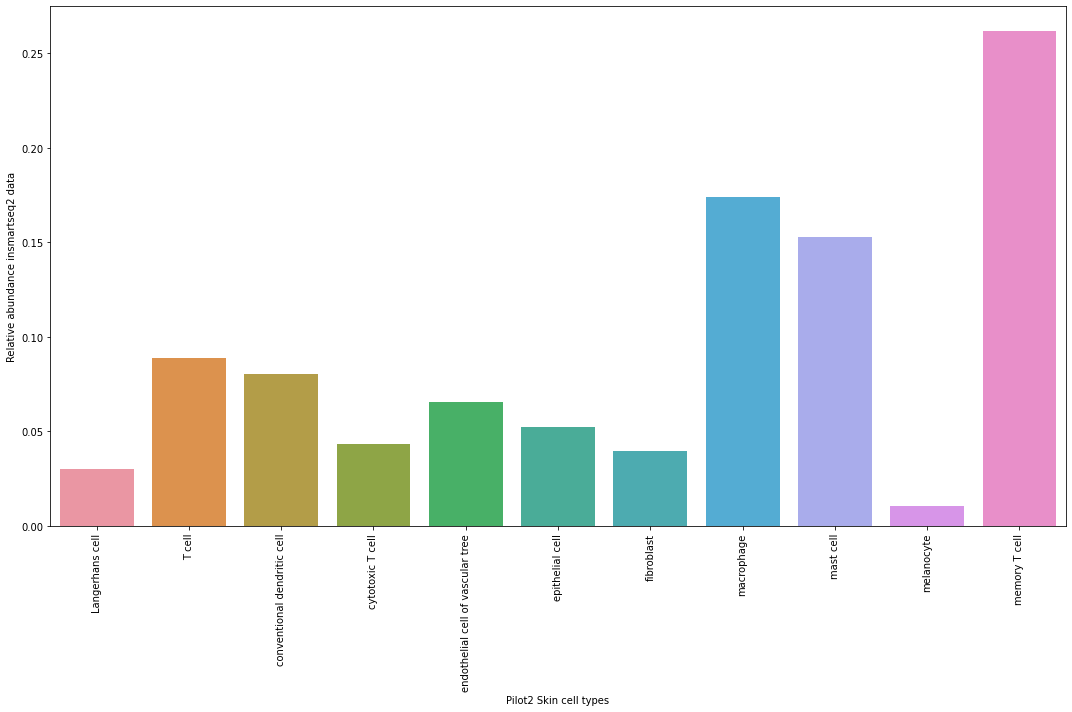

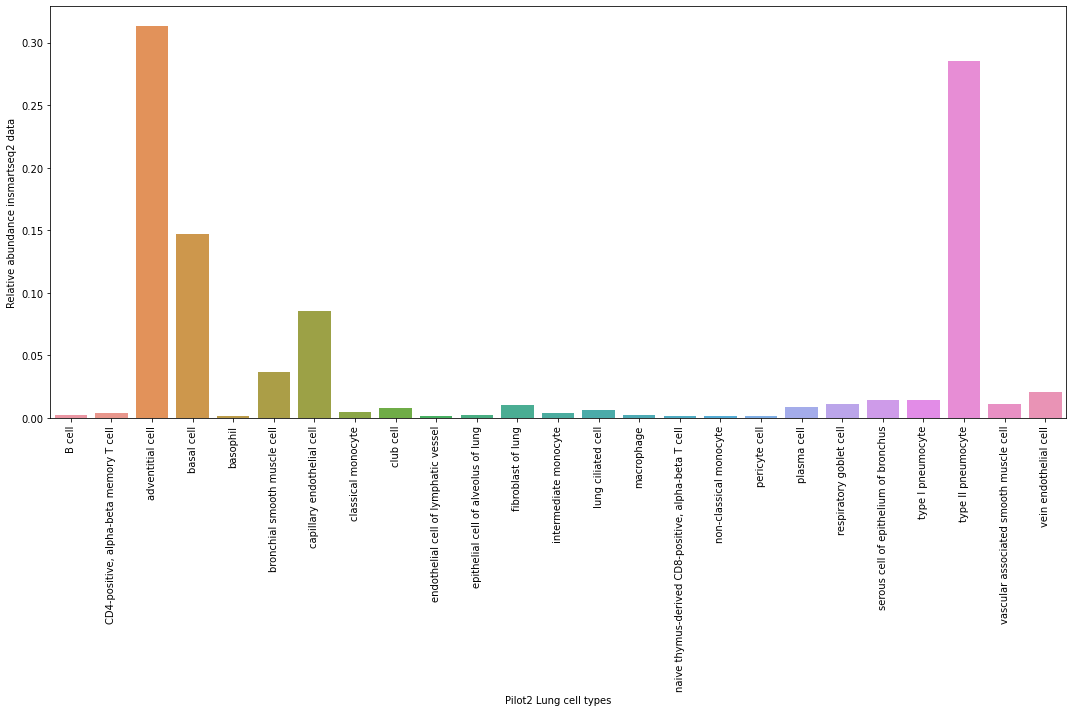

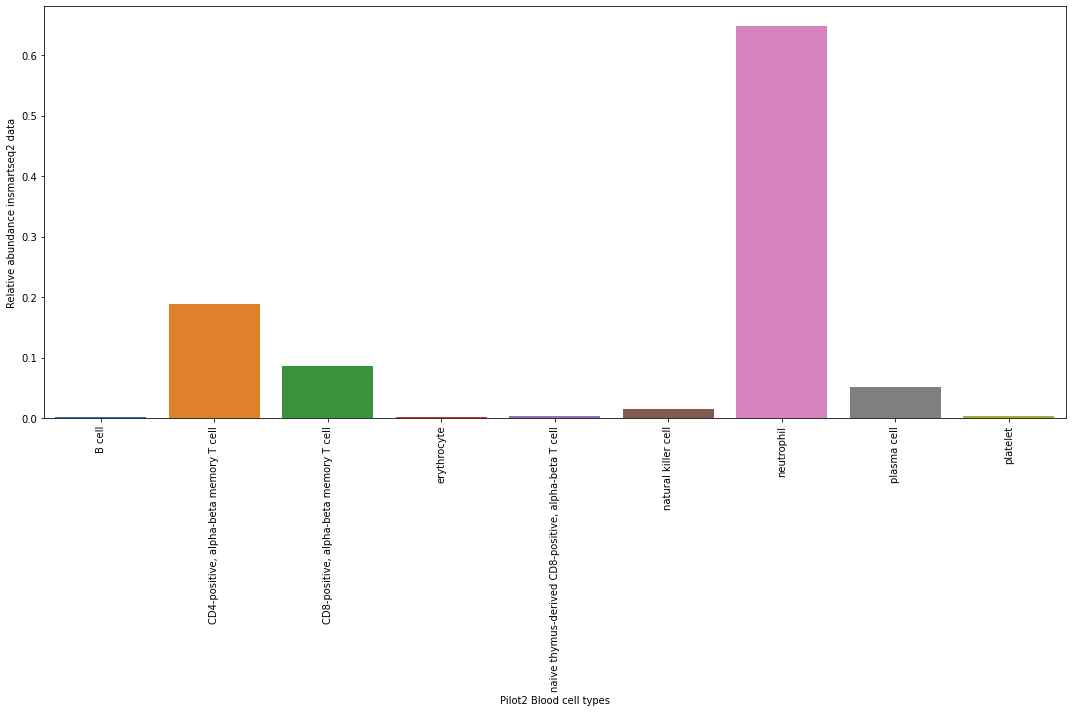

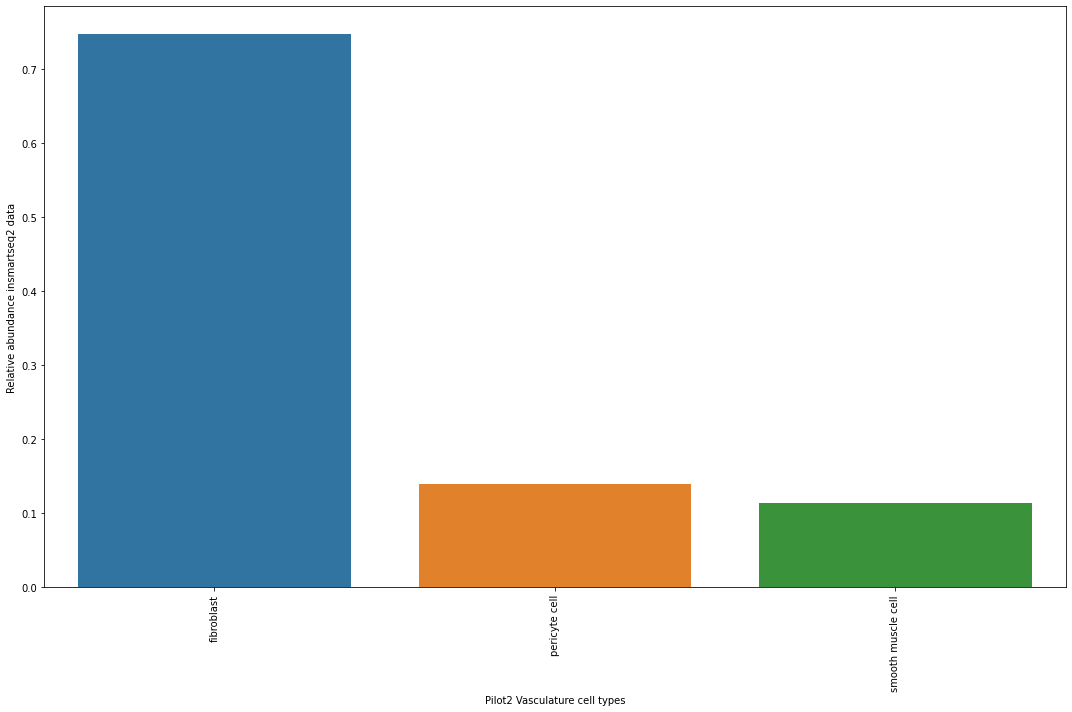

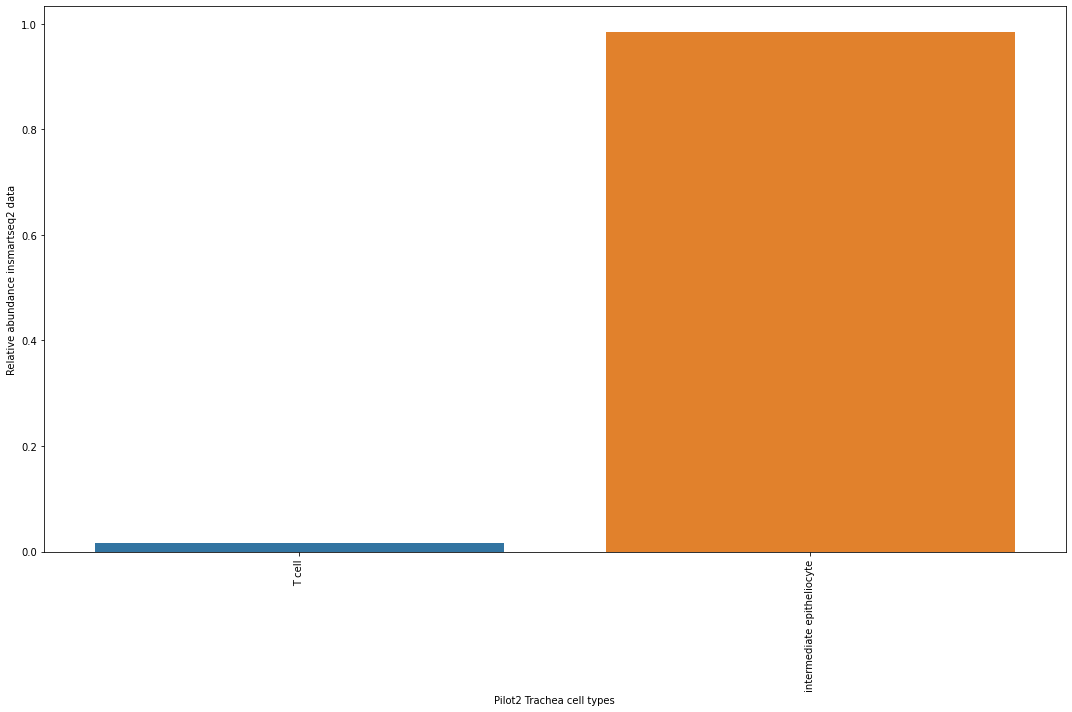

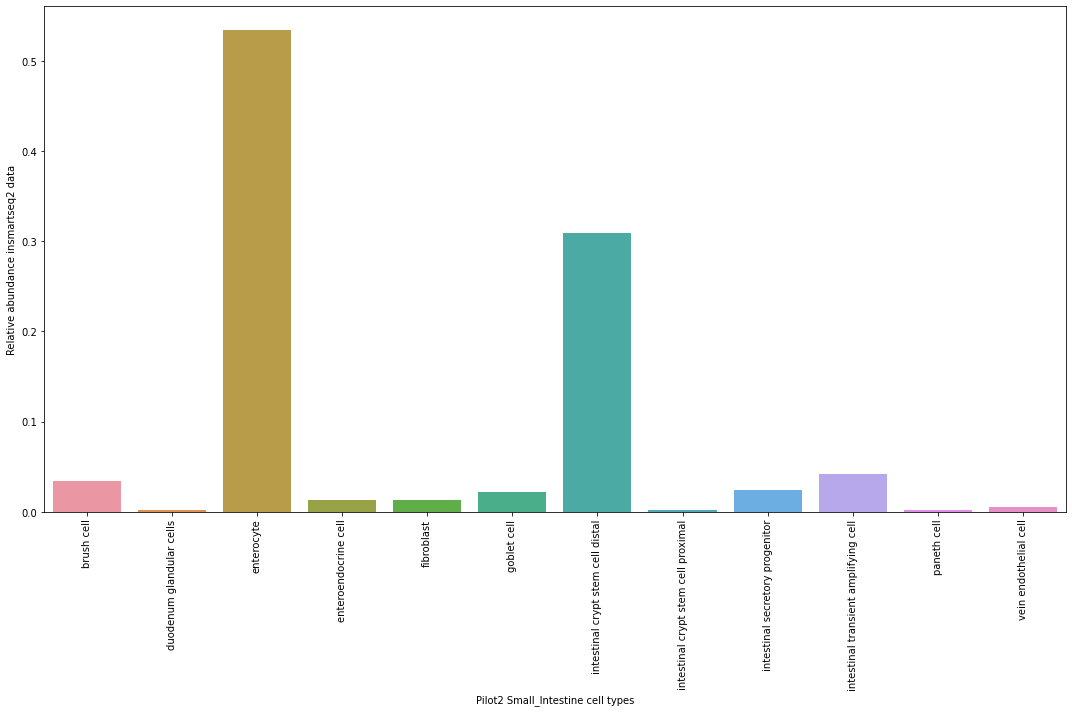

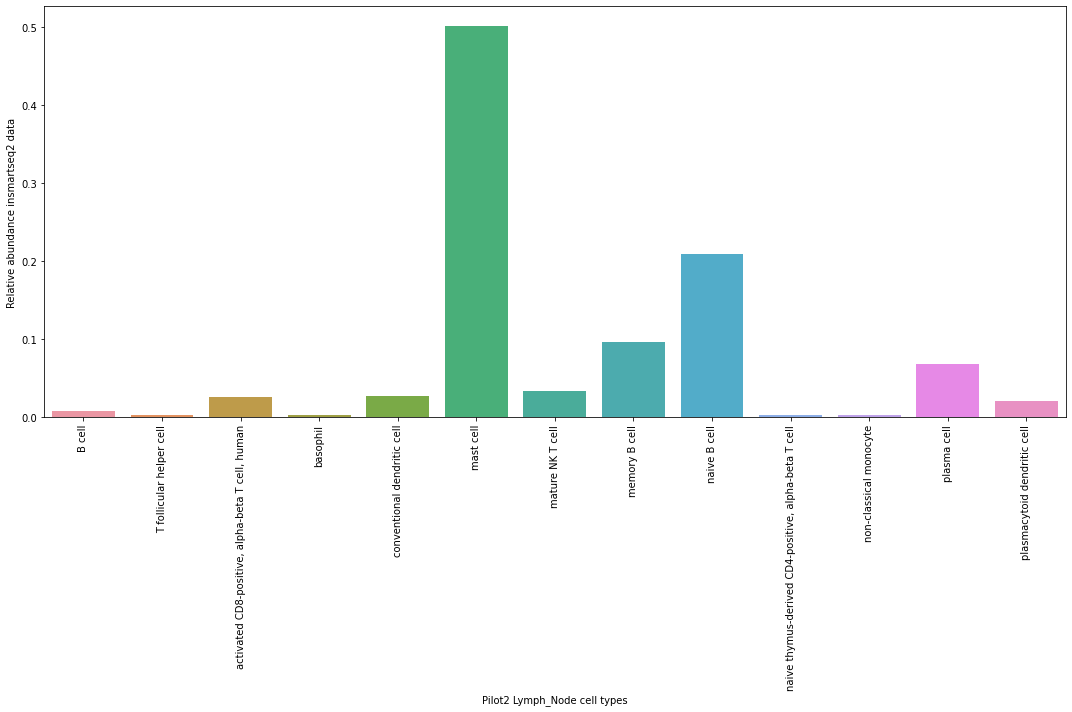

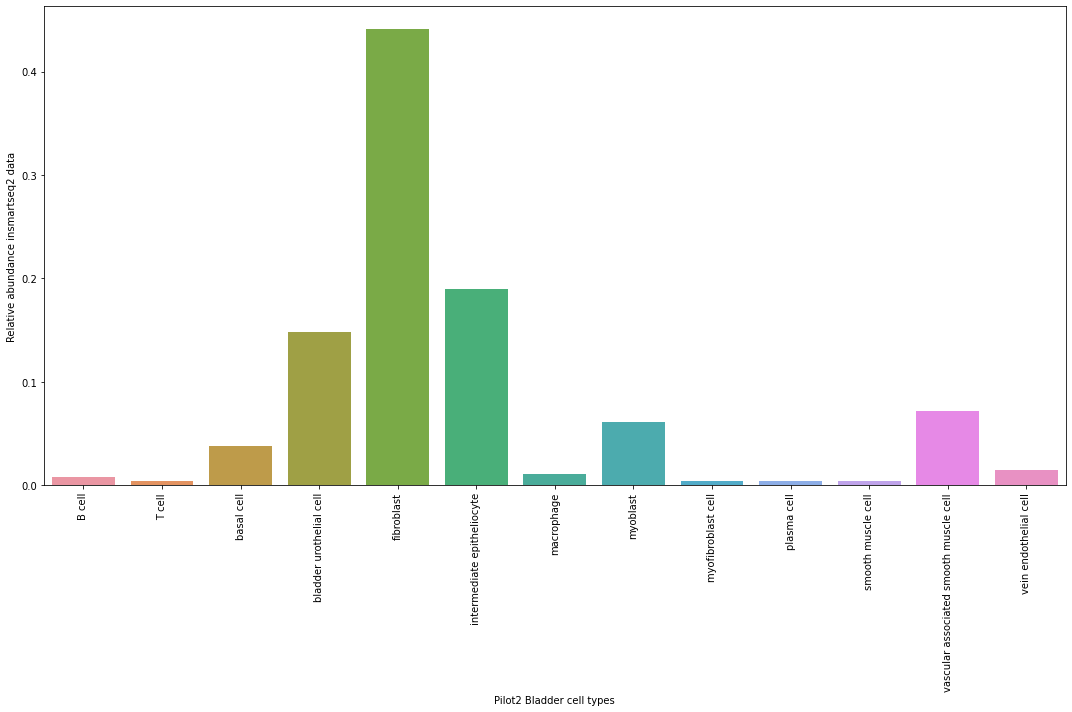

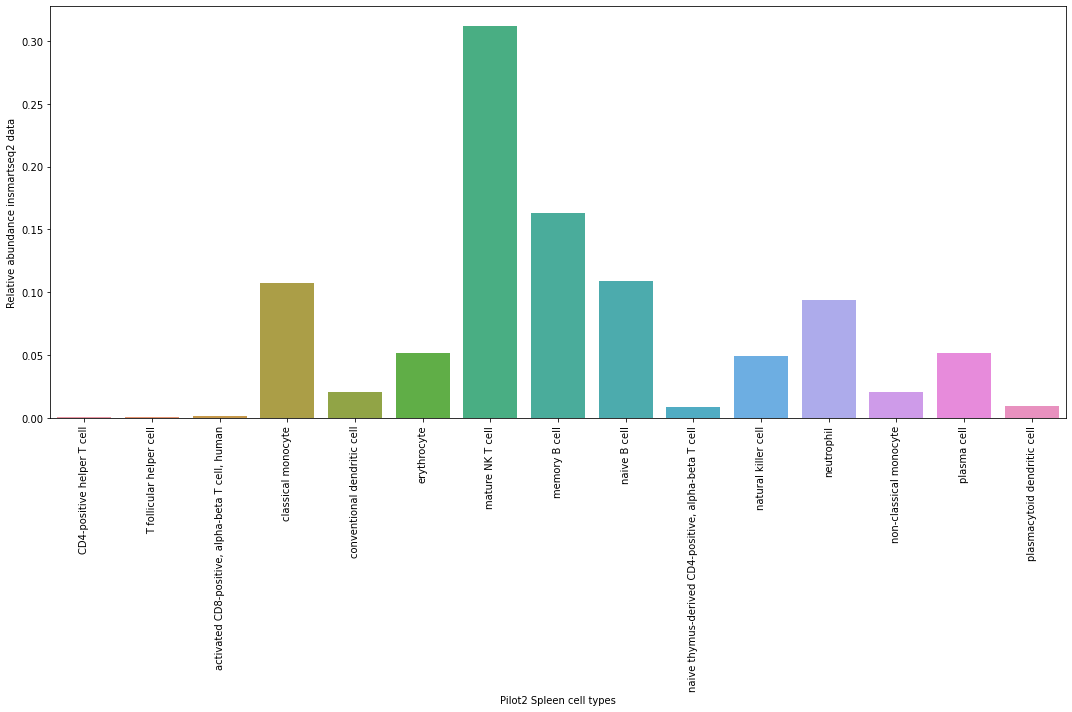

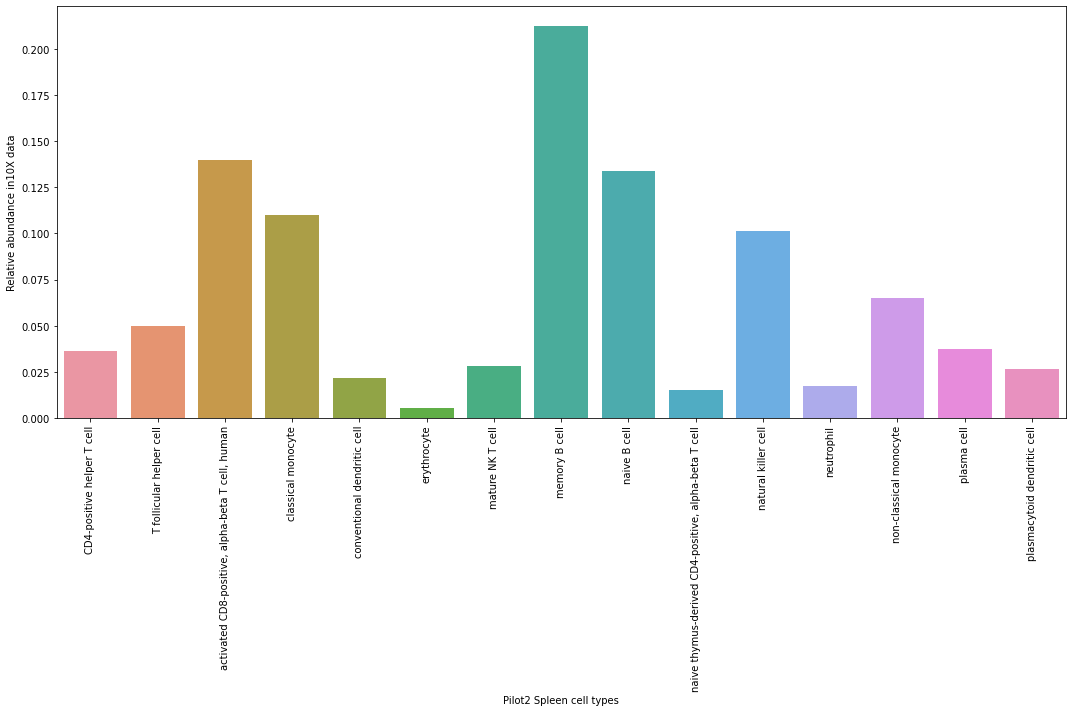

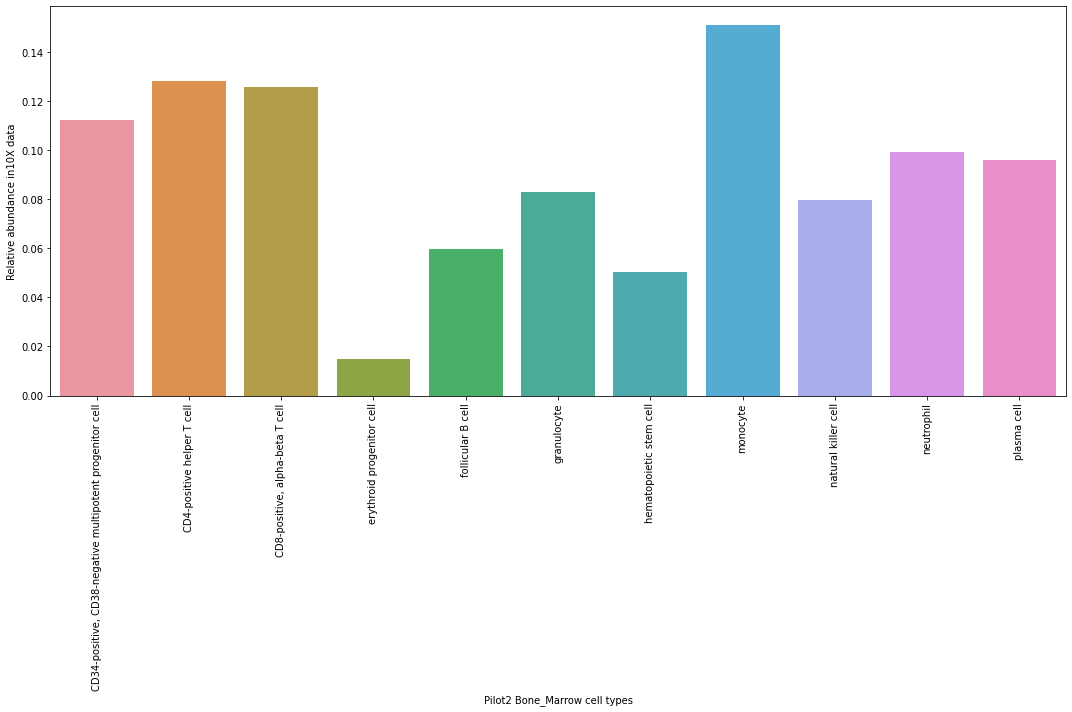

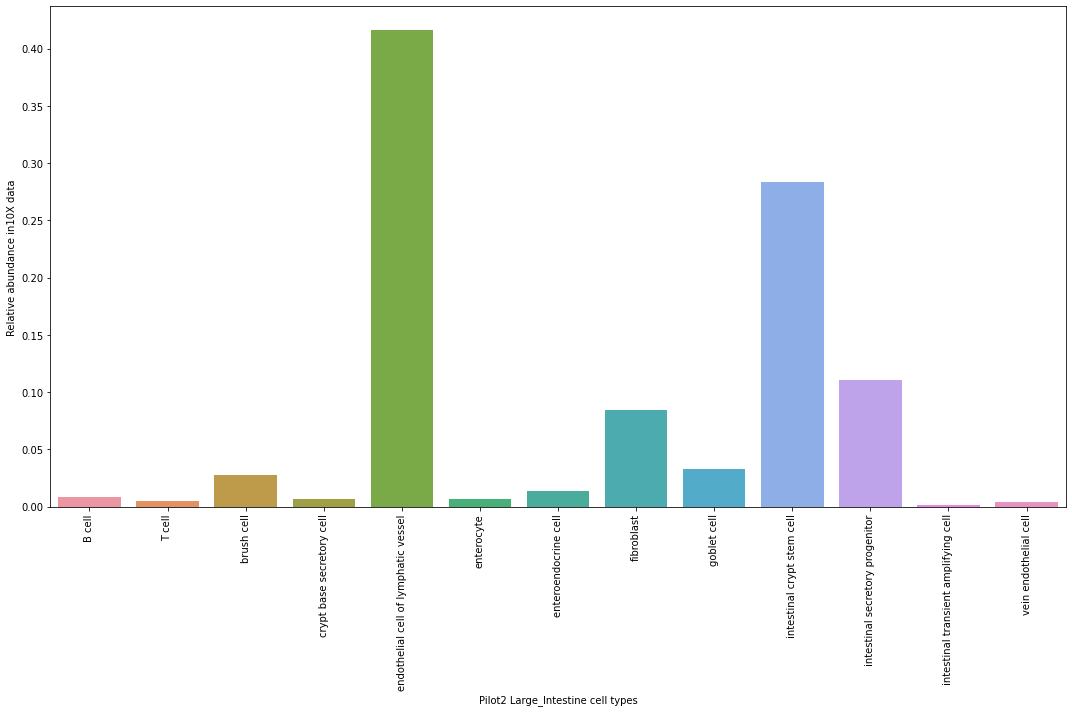

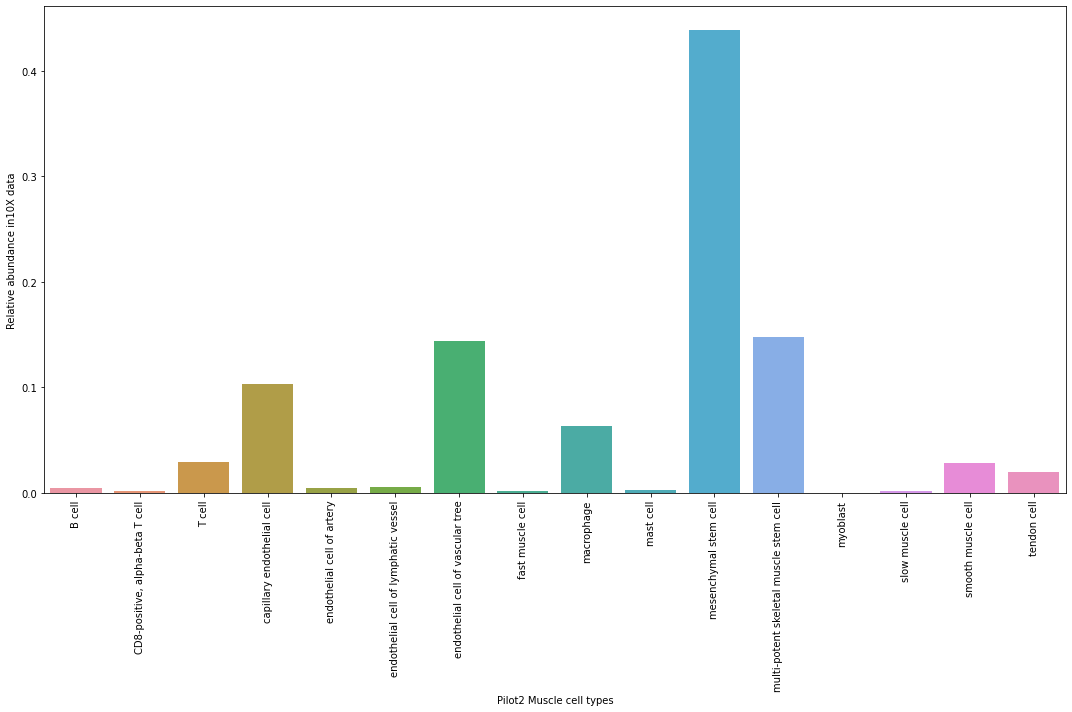

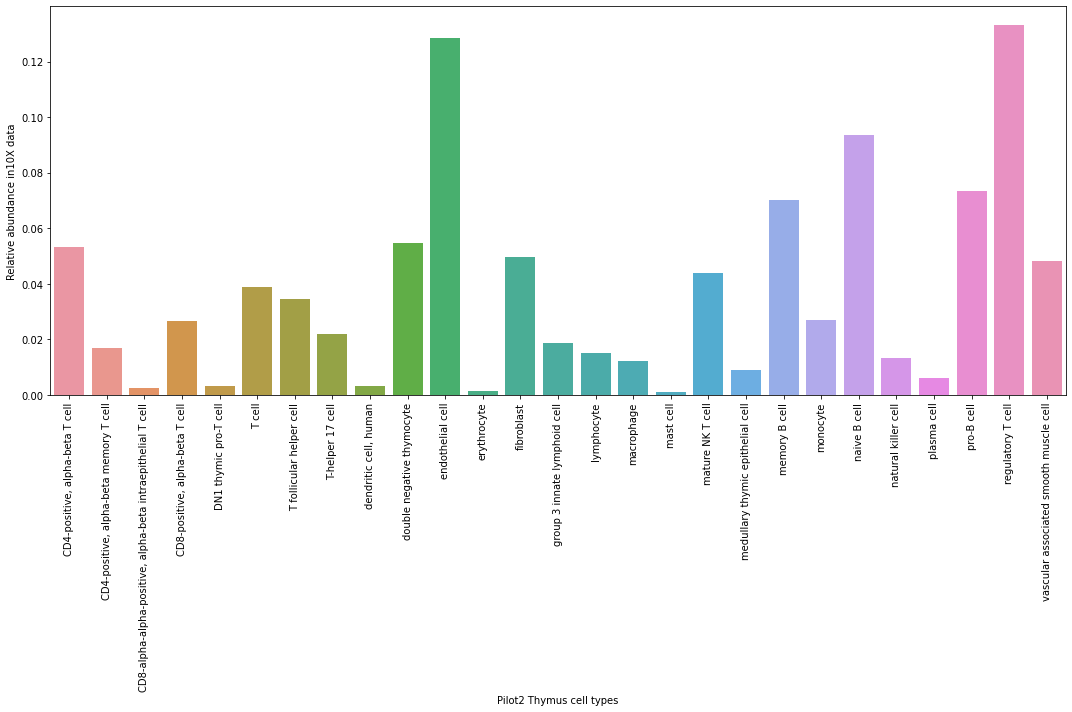

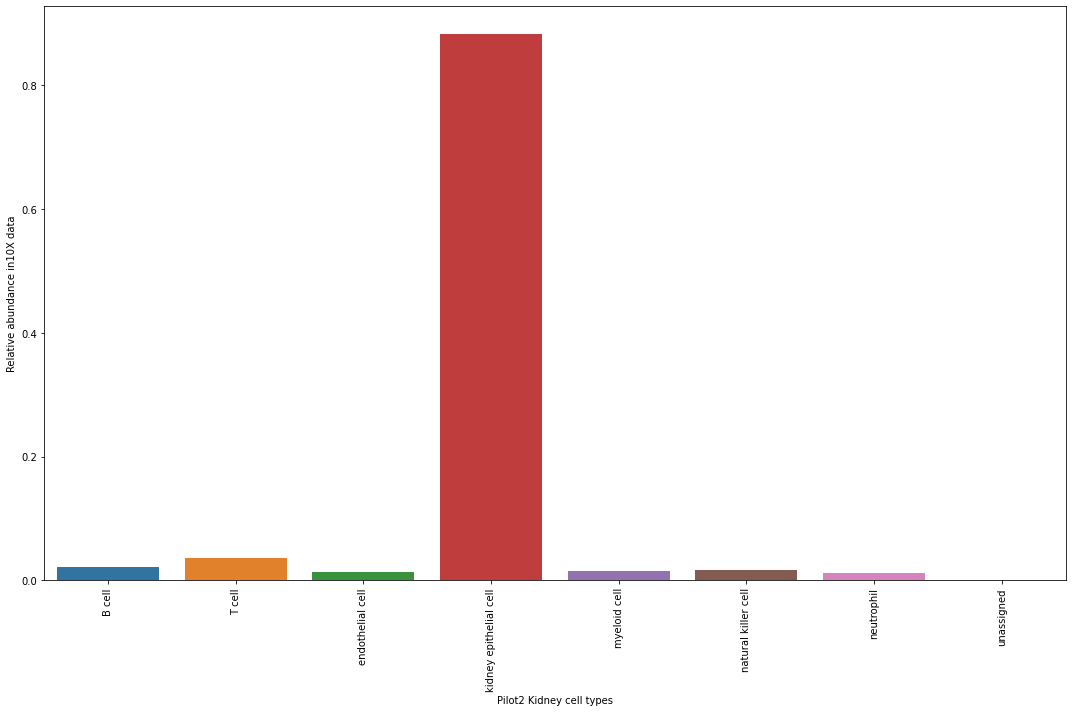

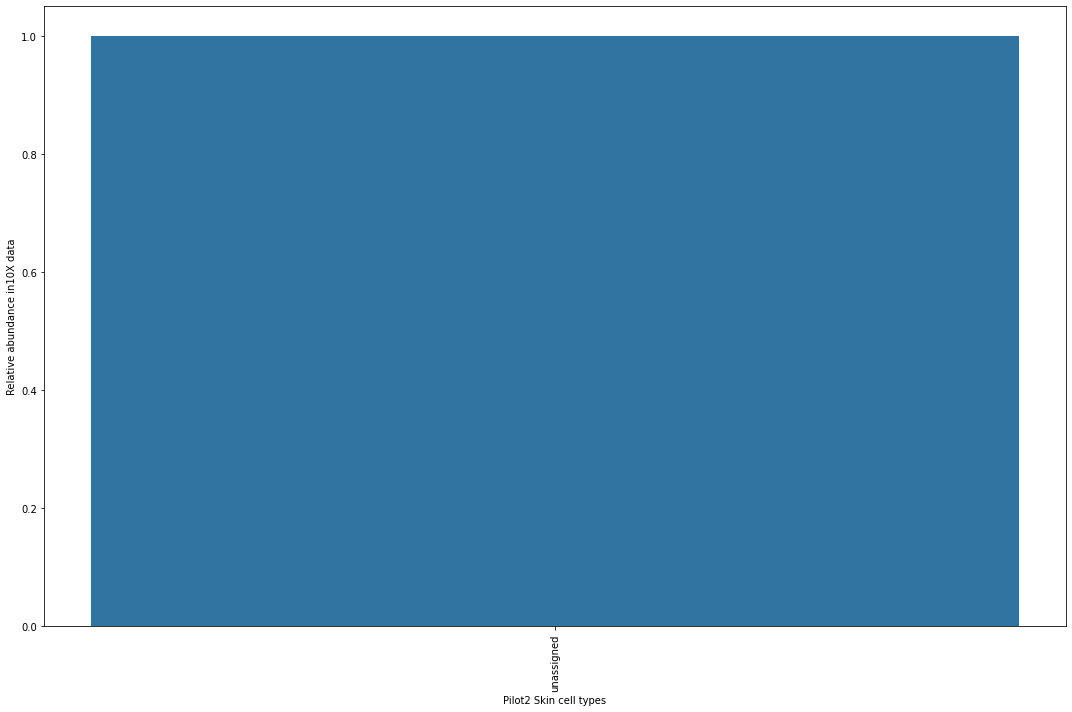

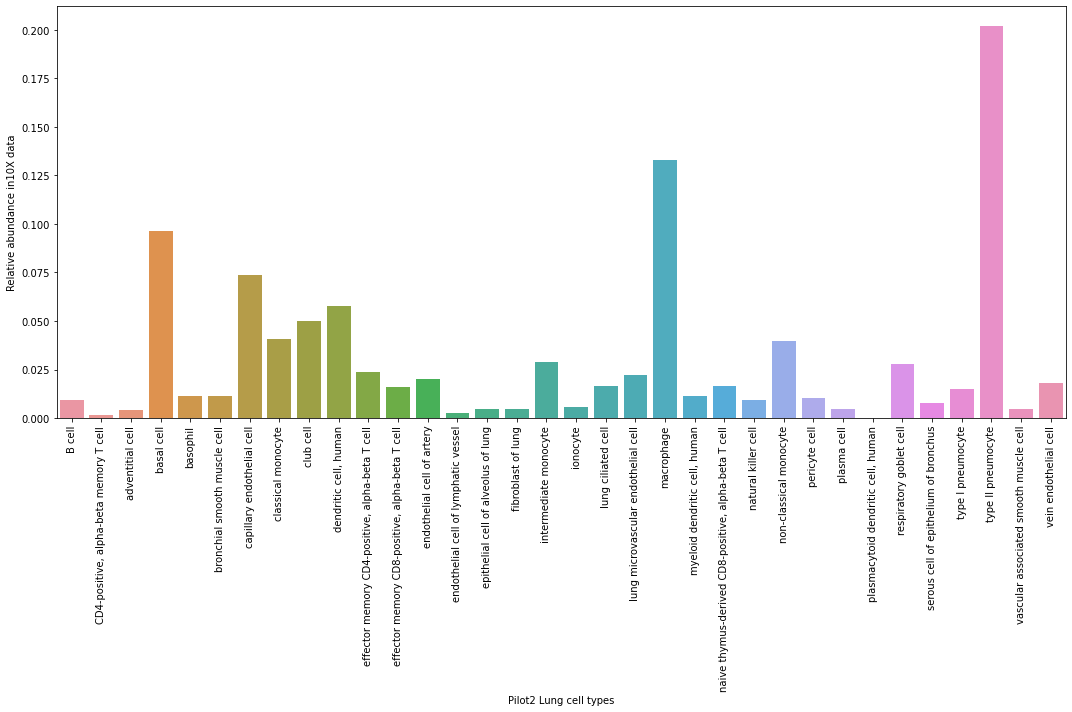

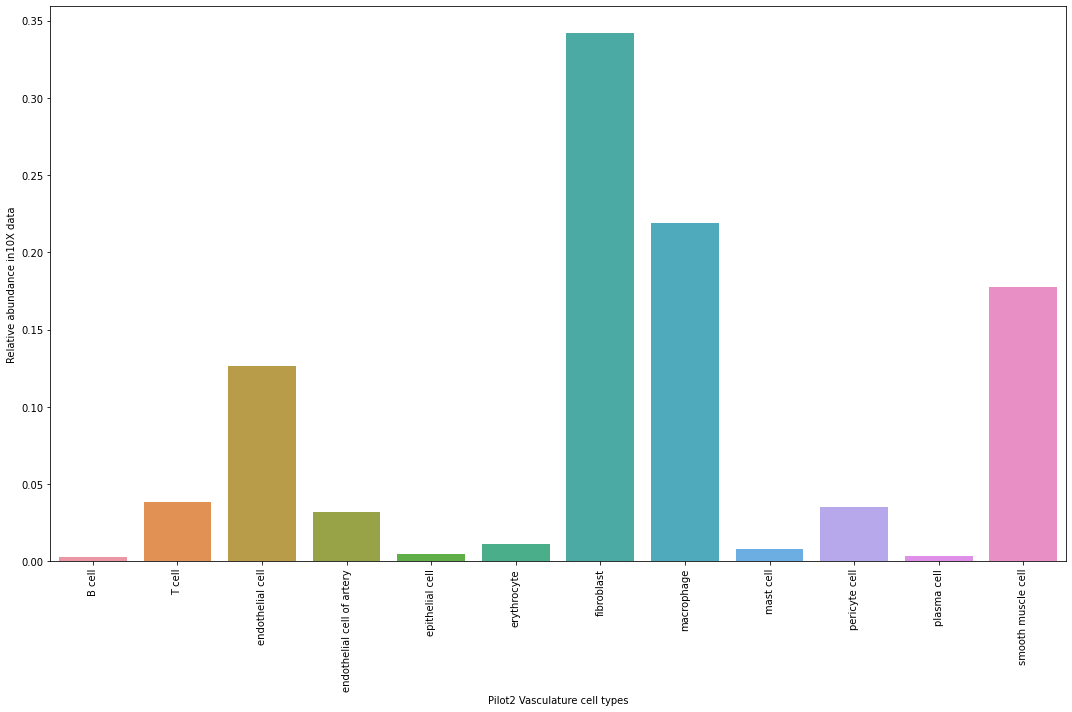

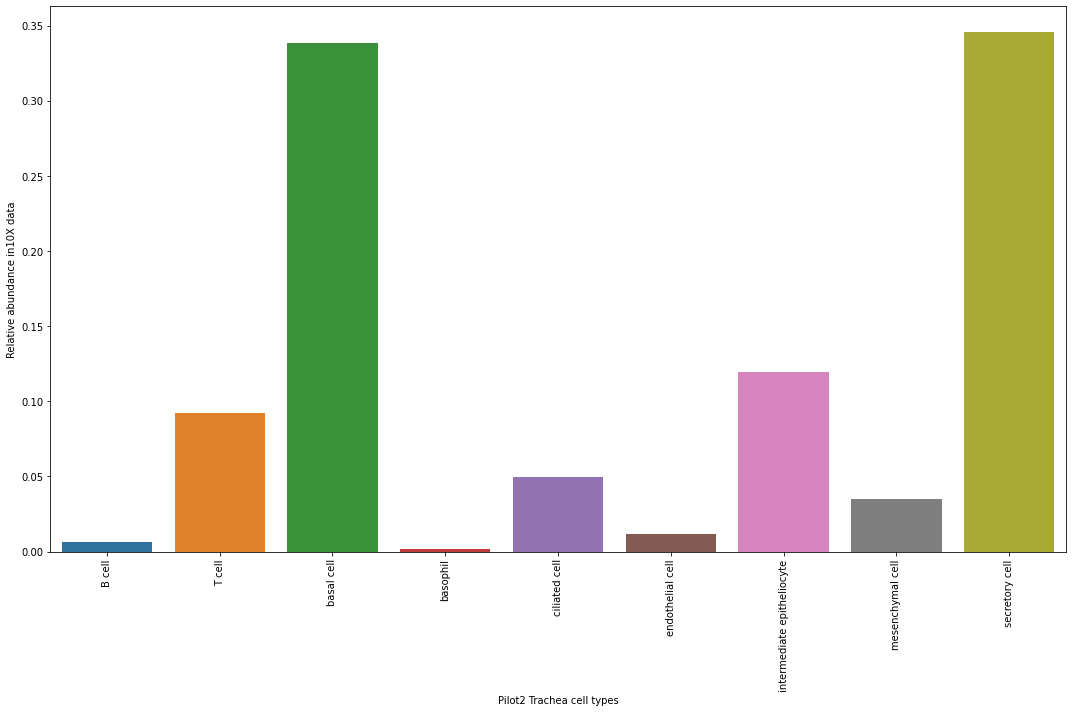

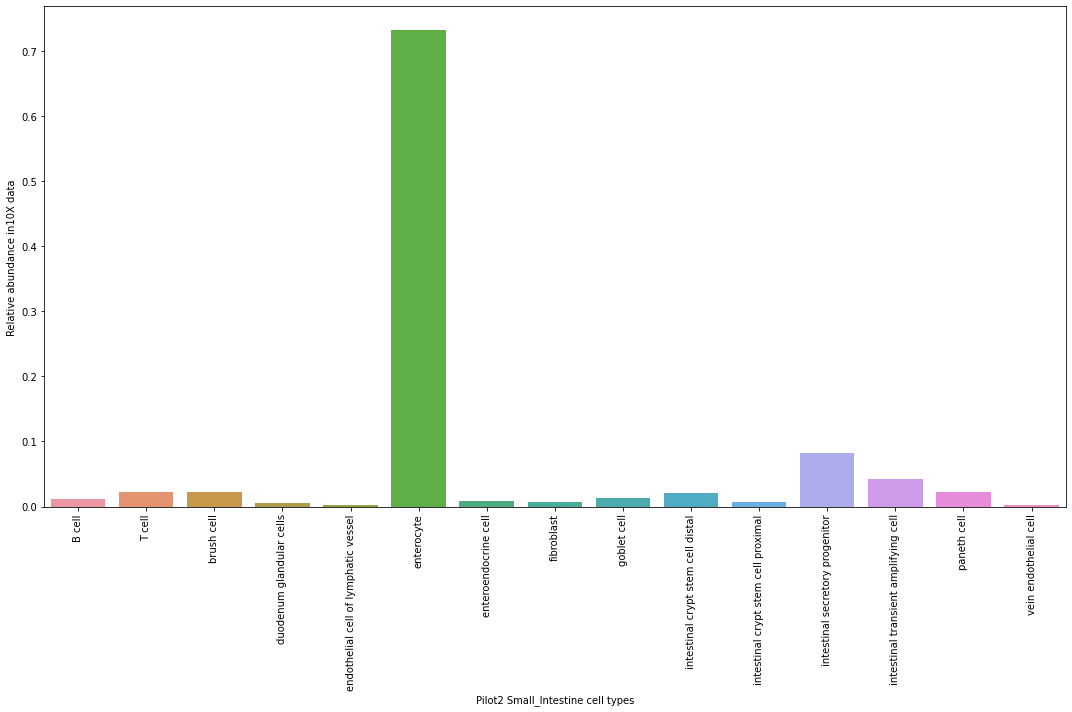

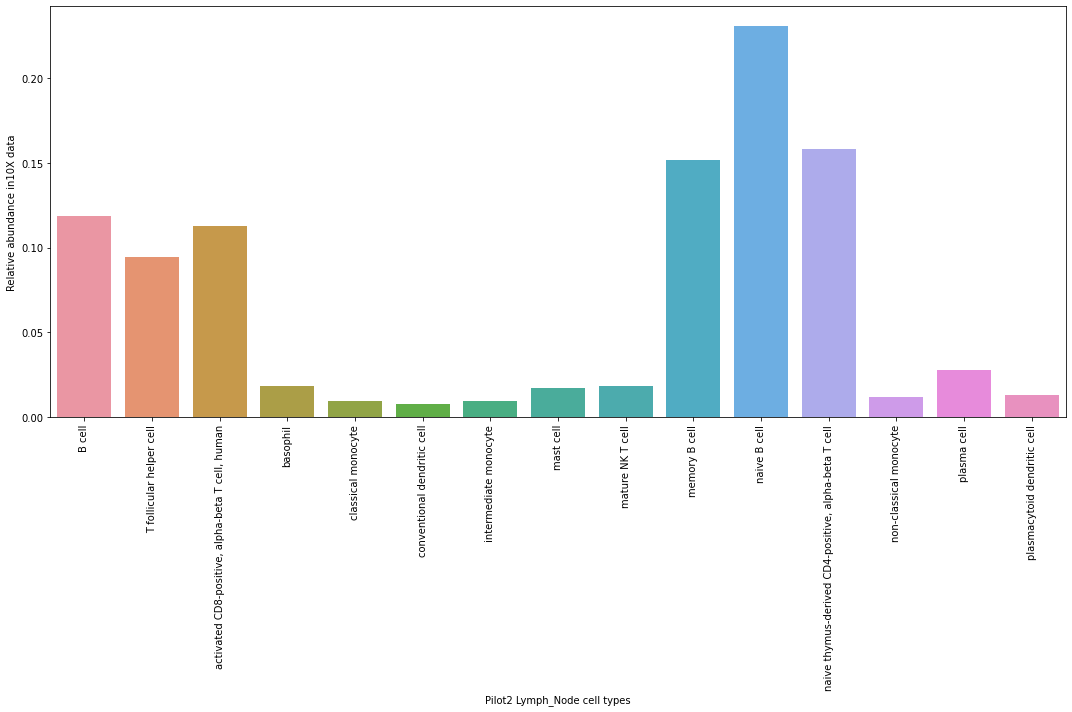

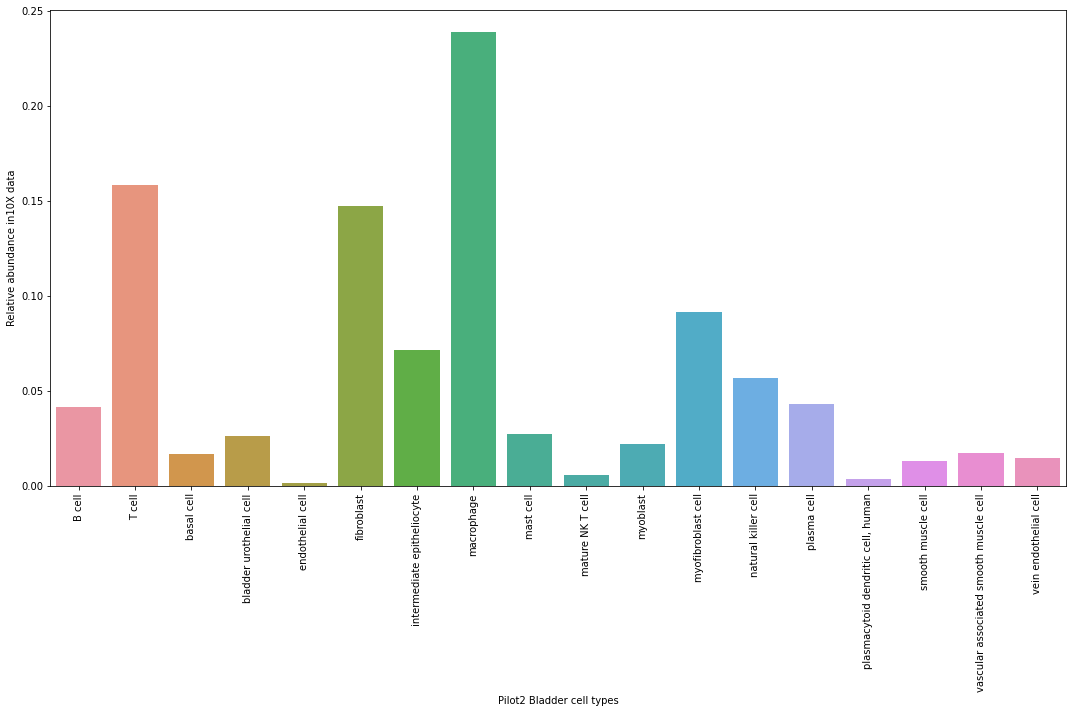

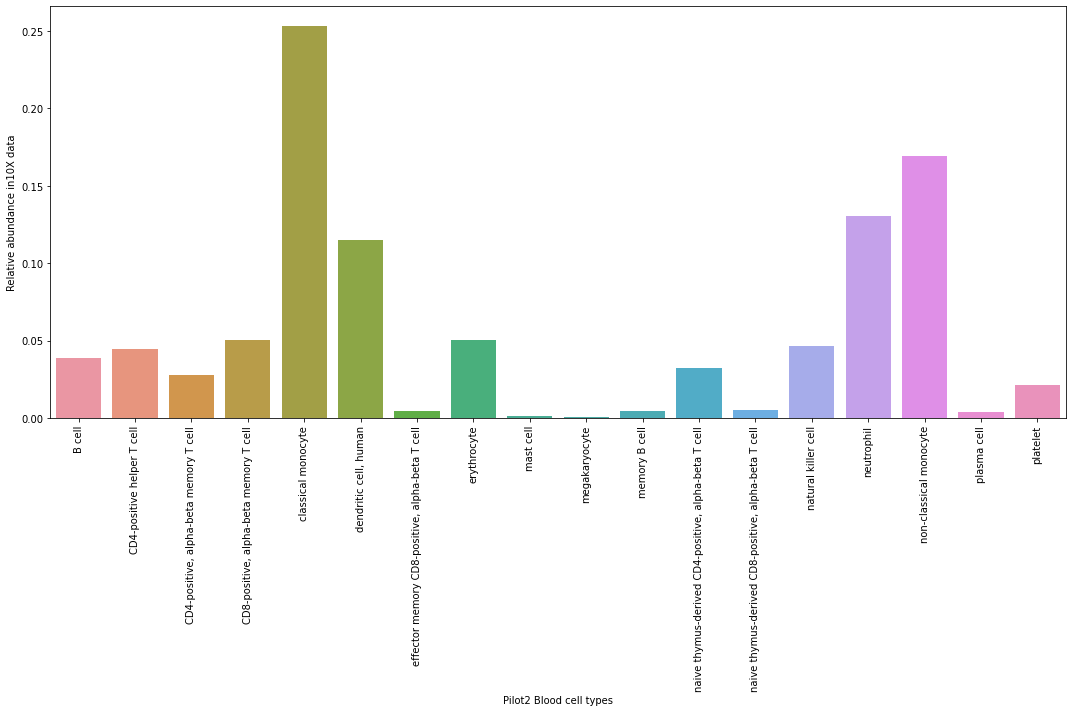

In [12]:
tiss_cell_fractions(adata[adata.obs['donor']=='TSP2'].copy(),
                        technology_col='method',
                        groupby='tissue',
                        category='propagated_cell_ontology_class',
                        dataset="Pilot2")

In [13]:
adata.obs.groupby(['tissue', 'propagated_cell_ontology_class', 'manual_cell_ontology_class'])

AnnData object with n_obs × n_vars = 203513 × 58870
    obs: '10X_run', 'smartseq2_barcode', 'smartseq2_library_plate', 'smartseq2_sorting_direction', 'smartseq2_sort_order', 'smartseq2_cDNA_Plate', 'cell_id', 'method', 'notes', 'donor', 'smartseq2_sorted_population', '10X_replicate', '10X_sample', 'sequencer', 'sex', 'anatomical_position', 'tissue', 'smartseq2_well_seq', '10X_barcode', 'n_counts', 'n_genes', 'batch', 'donor_tech_tissue', 'donor_tech', 'compartment', 'compartment_pred', 'propagated_cell_ontology_class', 'manual_cell_ontology_class'
    var: 'feature_types-0-0', 'n_cells-0-0', 'gene_symbol-0-0', 'n_cells-1-0', 'n_cells-0', 'feature_types-0-0-1', 'gene_symbol-0-0-1', 'n_cells-1-0-1', 'n_cells-1-1', 'n_cells', 'ensemble_id'
    uns: 'compartment_colors', 'compartment_pred_colors', 'donor_colors', 'donor_tech_colors', 'method_colors', 'neighbors', 'tissue_colors', 'umap'
    obsm: 'UMAP_donor_tech.100', 'UMAP_donor_tech.200', 'UMAP_donor_tech.50', 'X_scvi', 'X_scvi_donor_t